# <span style="color:navy"> Exercise 1 </span>

## 1.1 - Testing Parallel Random Number Generator
In the following exercises, we want to check the quality of the "Parallel Random Number Generator". To do so, we calculate the mean and variance of random numbers from a uniform distribution ranged in 
$[0,1)$, veryfing that they converge respectively to $\frac{1}{2}$ and to $\frac{1}{12}$.

Mean: $\langle r \rangle = \int_0^1 r dr = \frac{1}{2}$

Variance: $\sigma^2 = \int_0^1 (r-\frac{1}{2})^2 dr = \frac{1}{12}$

We use the "Data blocking method" to avoid potential correlations among data due to the deterministic nature of the algorithm: we devide the $M=10^5$ throws into $N=10^2$ blocks, for each block we calculate mean values, variances and rispective errors. At last we have pairs of block indices and the corresponding mean and variance for each block.

We calculate the cumulative effect by adding up the values progressively and evaluate the error as the standard deviation of the mean.

Finally we make a plot that shows the cumulative effect, showing how values converge as we increase the number of throws $M$ considered.

### Mean

In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import math

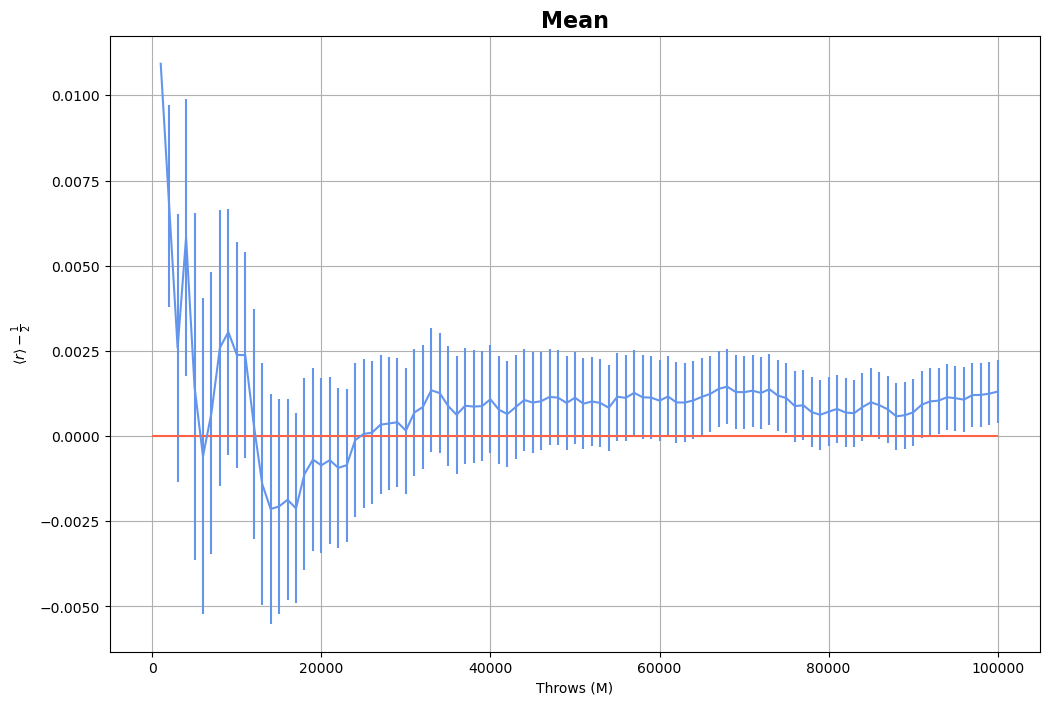

In [16]:
x, y, err = np.loadtxt("punto1.out", usecols=(0,1,2), delimiter="\t", unpack='true')
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x*1000, y-0.5, yerr=err, color='Cornflowerblue')
plt.hlines(0, 0, 100000, colors='tomato')

plt.xlabel('Throws (M)')
plt.ylabel(r'$\langle r \rangle-\frac{1}{2}$')
plt.title("Mean", fontsize=16, fontweight='bold')

plt.grid(True)
plt.show()

This output meets our expectations:

The mean values approach $\frac{1}{2}$ and the error bars decrease as the number of throws increases.
The only doubt could be that error bars don’t always include the actual mean.

### Variance

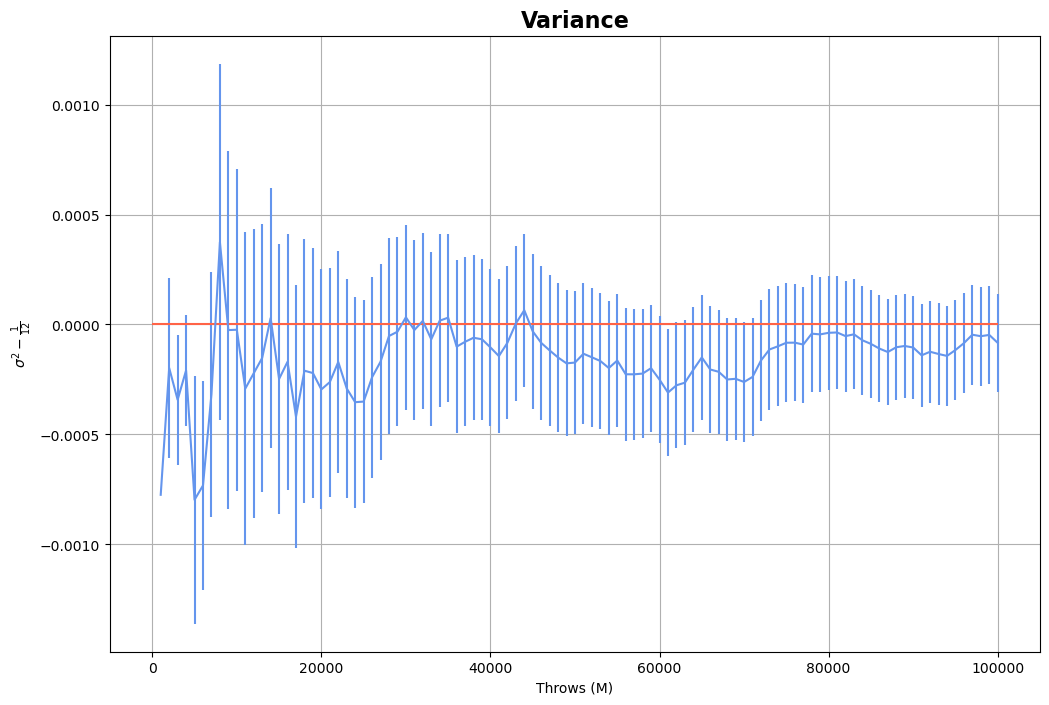

In [36]:
x, y, err = np.loadtxt("punto1.out", usecols=(0,3,4), delimiter="\t", unpack='true')
fig=plt.figure(figsize=(12, 8))
plt.errorbar(x*1000, y-1/12, yerr=err, color='Cornflowerblue')
plt.hlines(0, 0, 100000, colors='tomato')

plt.xlabel('Throws (M)')
plt.ylabel(r'$\sigma^2-\frac{1}{12}$')
plt.title("Variance",fontsize=16, fontweight='bold')

plt.grid(True)
plt.show()

### $\chi^2$ test

We now use the $\chi^2$ to test the uniformity of the generator:

We generate $n=10^5$ random numbers, dividing the interval $[0, 1]$ into $M=100$ subintervals. We expect the number of values extracted in each subinterval to be simply $\frac{n}{M}$, and that the $\chi^2$ value should therefore be approximately equal to the number of defined subintervals.

In the subsequent histogram we can see that $M=100$ almost corresponds to the peak of the distribution of $\chi^2$ values obtained in 100 of these tests, which is approximately around $M=90$. This confirms our expectation.

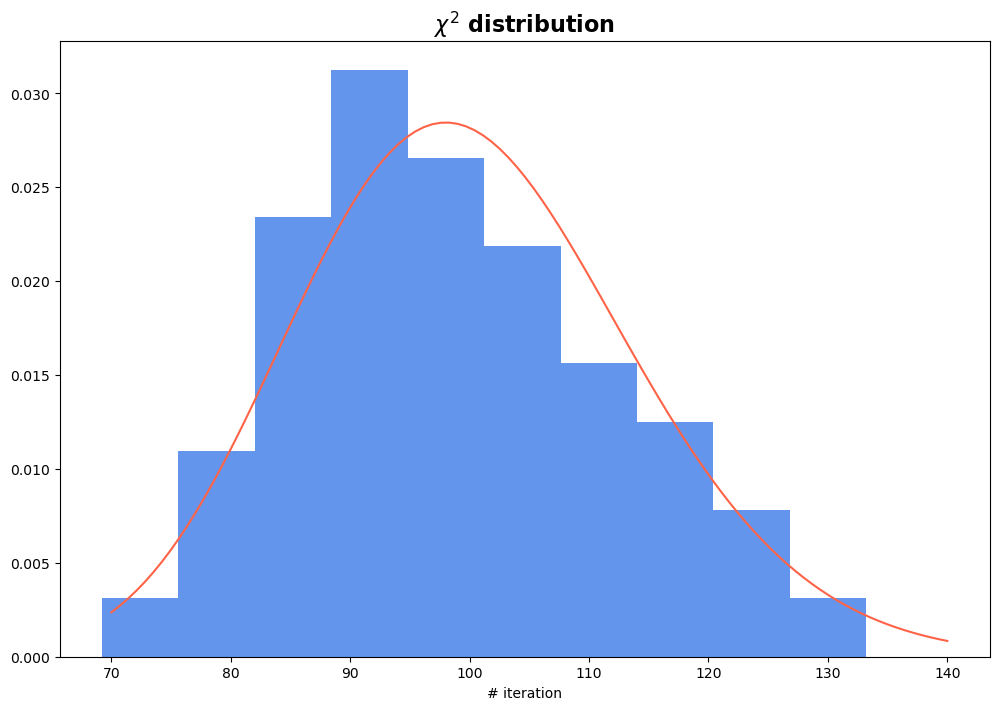

In [18]:
chi=np.loadtxt("punto3.out", usecols=(1), delimiter="\t", unpack='true')
plt.figure(figsize=(12, 8))
plt.hist(chi, density = True, color='Cornflowerblue')
def f(x):
    return(x**(50-1))*(np.exp(1)**(-x/2))/(2**50 * math.factorial(49))
x = np.linspace(70, 140, 100)
plt.plot(x, f(x), color='tomato')
plt.title('$\chi^2$ distribution',fontsize=16, fontweight='bold')
plt.xlabel('# iteration')

plt.show()

## 1.2 - Inversion of the cumulative and Central Limit Theorem

The goal here is to extend the given Pseudo-Random Number Generator to generate two other distributions:

- Exponential: $p(x)=λ\exp(−λx)$ 
- Cauchy-Lorentz: $p(x)= \frac{1}{π}\frac{\gamma}{(x-x_{0})^2+\gamma^2}$

We use cumulative inversion, so the calculations are as follows:

- Exponential: $F(r)=-\frac{1}{\lambda}\ln(1-r)$ with $r$ uniformly distributed between 0 and 1
- Lorentzian: $F(r)=\gamma \tan(\pi(r-\frac{1}{2}))$ with $r$ uniformly distributed between 0 and 1

Our aim is to test the Central Limit Theorem. It states that the sum (or mean) of many independent, identically distributed variables tends toward a Gaussian distribution, even with different input distributions, if they have a finite variance.

For a given N, the sum of independent variables is:
$S_{N}=\frac{1}{N}\sum_{i=1}^N x_{i}$ 
where $x_{i}$ denotes the result obtained from the throw of a "dice" whose results are distributed according to one of the functions illustrated above.

To achieve this, we plot three graphs for each distribution:

1. Uniform dice throws within the $[0,1)$ range
2. Exponential distribution with $𝜆=1$,
3. Lorentzian distribution with $𝑥_{0}=0$, $𝛾=1$

For each plot, we show histograms for $N=1, 2, 10, 100$ to highlight the sum’s tendency toward Gaussian (or Lorentzian) distribution. Each histogram is filled by $10^4$ iterations of the experiment.

### Uniform distribution

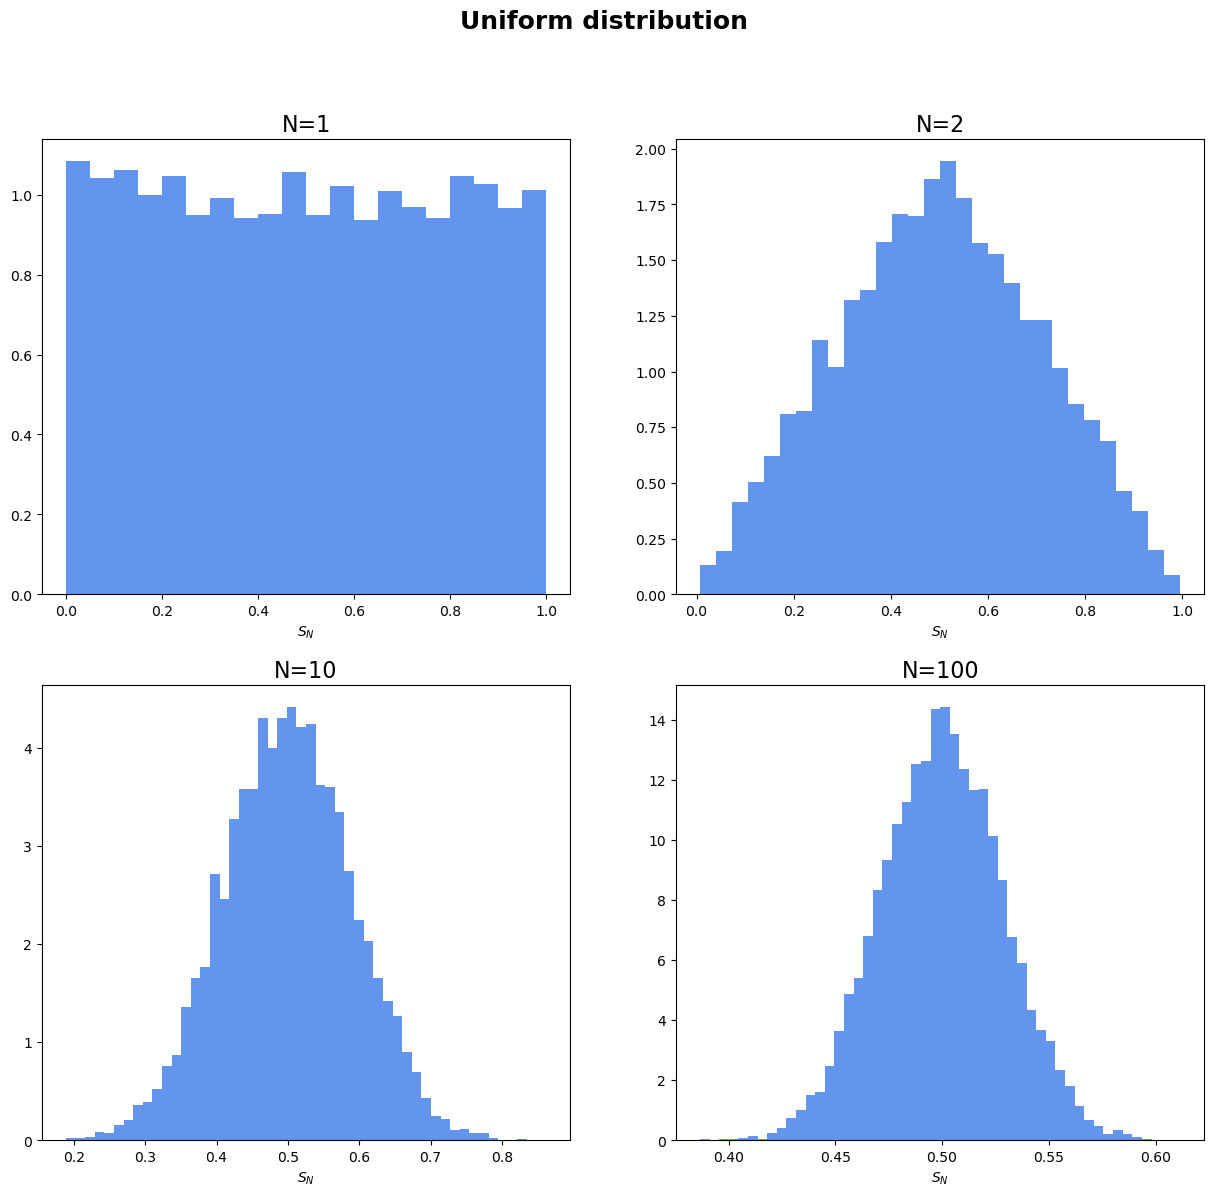

In [33]:
uni, uni2, uni10, uni100 = np.loadtxt("punto12Unif.out", usecols=(0, 1, 2, 3), delimiter="\t", unpack=True)

# Creazione della figura
fig = plt.figure(figsize=(15, 13))
fig.suptitle('Uniform distribution', fontsize=18, fontweight='bold')  # Titolo generale in grassetto

# N=1
plt.subplot(2, 2, 1)
plt.title('N=1', fontsize=16)
plt.xlabel('$S_N$')
plt.hist(uni, bins=20, density=True, color='Cornflowerblue') 

# N=2
plt.subplot(2, 2, 2)
plt.title('N=2', fontsize=16)
plt.xlabel('$S_N$')
plt.hist(uni2, bins=30, density=True, color='Cornflowerblue') 

# N=10
plt.subplot(2, 2, 3)
plt.title('N=10', fontsize=16)
plt.xlabel('$S_N$')
plt.hist(uni10, bins=50, density=True, color='Cornflowerblue') 

# N=100
plt.subplot(2, 2, 4)
plt.title('N=100', fontsize=16)
plt.xlabel('$S_N$')
plt.hist(uni100, bins=50, density=True, color='Cornflowerblue')  

# Mostra il grafico
plt.show()


### Exponential distribution


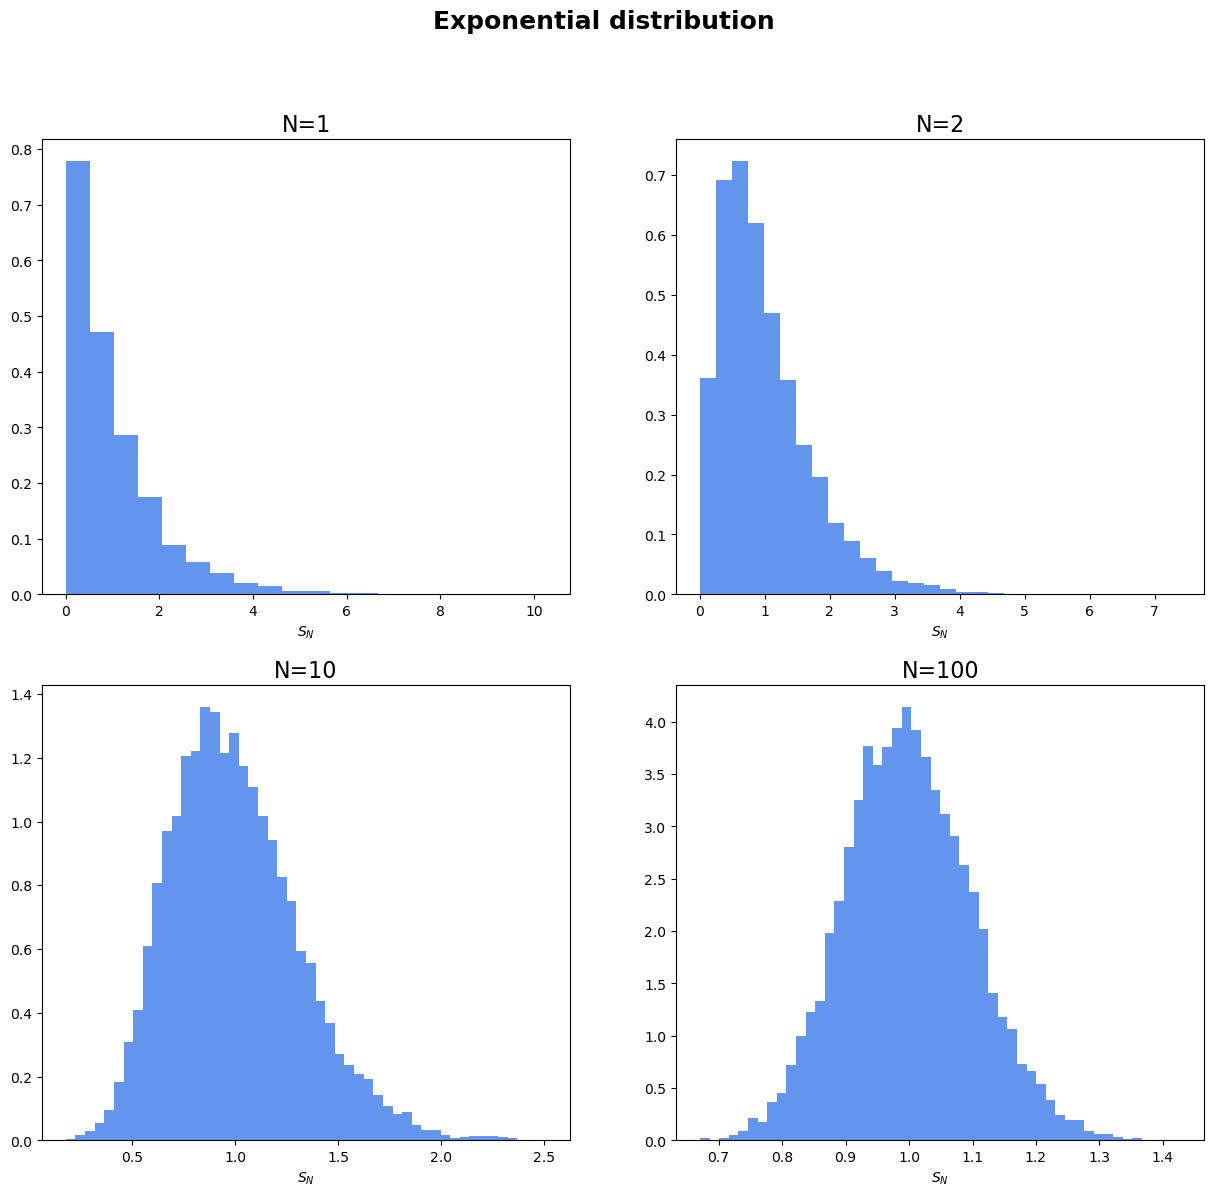

In [28]:
exp1, exp2, exp10, exp100 = np.loadtxt("punto12Exp.out", usecols=(0, 1, 2, 3), delimiter= "\t", unpack= 'true')
fig=plt.figure(figsize=(15, 13))
fig.suptitle('Exponential distribution', fontsize=18, fontweight='bold')
#N=1
plt.subplot(2, 2, 1)
plt.xlabel('$S_N$')
plt.title('N=1', fontsize=16)
plt.hist(exp1, bins = 20, density = True, color='Cornflowerblue')
#N=2
plt.subplot(2, 2, 2)
plt.xlabel('$S_N$')
plt.title('N=2', fontsize=16)
plt.hist(exp2, bins = 30, density = True, color='Cornflowerblue')
#N=10
plt.subplot(2, 2, 3)
plt.xlabel('$S_N$')
plt.title('N=10', fontsize=16)
plt.hist(exp10, bins = 50, density = True, color='Cornflowerblue')
#N=100
plt.subplot(2, 2, 4)
plt.xlabel('$S_N$')
plt.title('N=100',fontsize=16)
plt.hist(exp100, bins = 50, density = True, color='Cornflowerblue')
plt.show()

### Lorentzian distribution

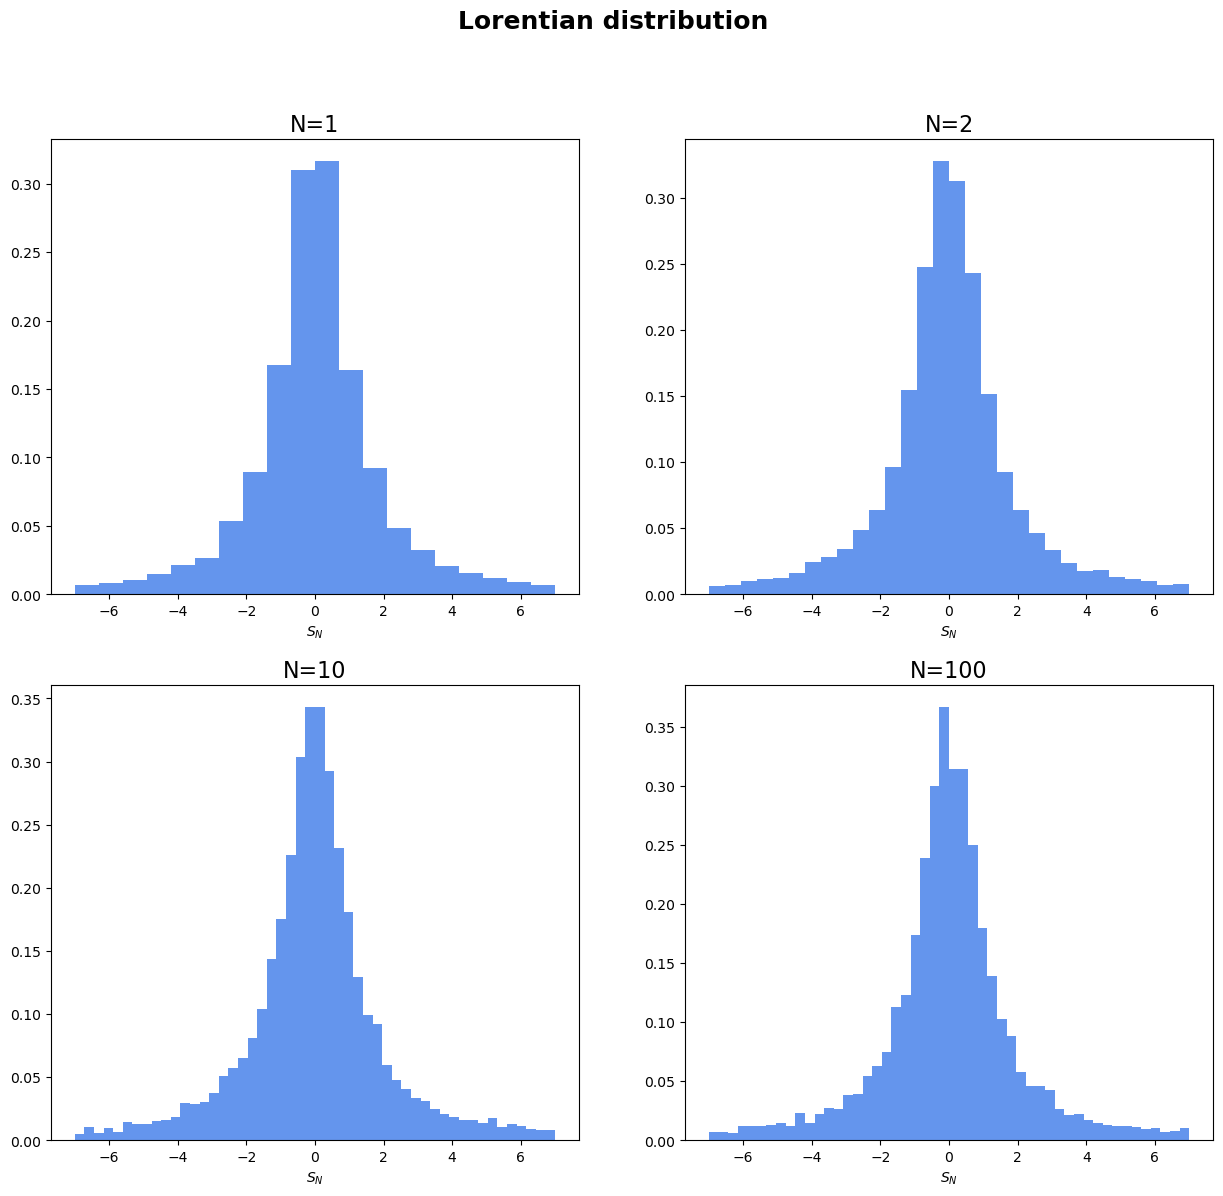

In [27]:
lor, lor2, lor10, lor100 = np.loadtxt("punto12Lor.out", usecols=(0, 1, 2, 3), delimiter= "\t", unpack= 'true')
fig=plt.figure(figsize=(15, 13))
fig.suptitle('Lorentian distribution', fontsize=18, fontweight='bold')
#N=1
plt.subplot(2, 2, 1)
plt.xlabel('$S_N$')
plt.title('N=1',fontsize=16)
plt.hist(lor, bins = 20, range= [-7, 7], density = True, color='Cornflowerblue')
#N=2
plt.subplot(2, 2, 2)
plt.xlabel('$S_N$')
plt.title('N=2', fontsize=16)
plt.hist(lor2, bins = 30, range= [-7, 7], density = True, color='Cornflowerblue')
#N=10
plt.subplot(2, 2, 3)
plt.xlabel('$S_N$')
plt.title('N=10',fontsize=16)
plt.hist(lor10, bins = 50, range= [-7, 7], density = True, color='Cornflowerblue')
#N=100
plt.subplot(2, 2, 4)
plt.xlabel('$S_N$')
plt.title('N=100',fontsize=16)
plt.hist(lor100, bins = 50, range= [-7, 7], density = True, color='Cornflowerblue')
plt.show()

## 1.3 - Buffon's experiment

We can use Buffon's experiment to estimate the value of $\pi$ numerically.

This experiment involves needles of a certain length and a field with parallel lines. We calculate the probability of a needle hitting a line as a function of $\pi$. We use the "Hit-Miss" Monte Carlo method to approximate $\pi$:

$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$

where $L$ is the needle lenght and $d$ is the space between the field lines, $N_{thr}$ is the total number of drops and $N_{hit}$ is the number of drops where the needle crosses a line.

To randomize the needle position, we need to generate the coordinates of one of its ends and the angle at which it falls on the floor. The angular issue can be resolved by generating two-dimensional points with coordinates (x, y) inside a circle (centered at (0, 0)), since we cannot use $\pi$.

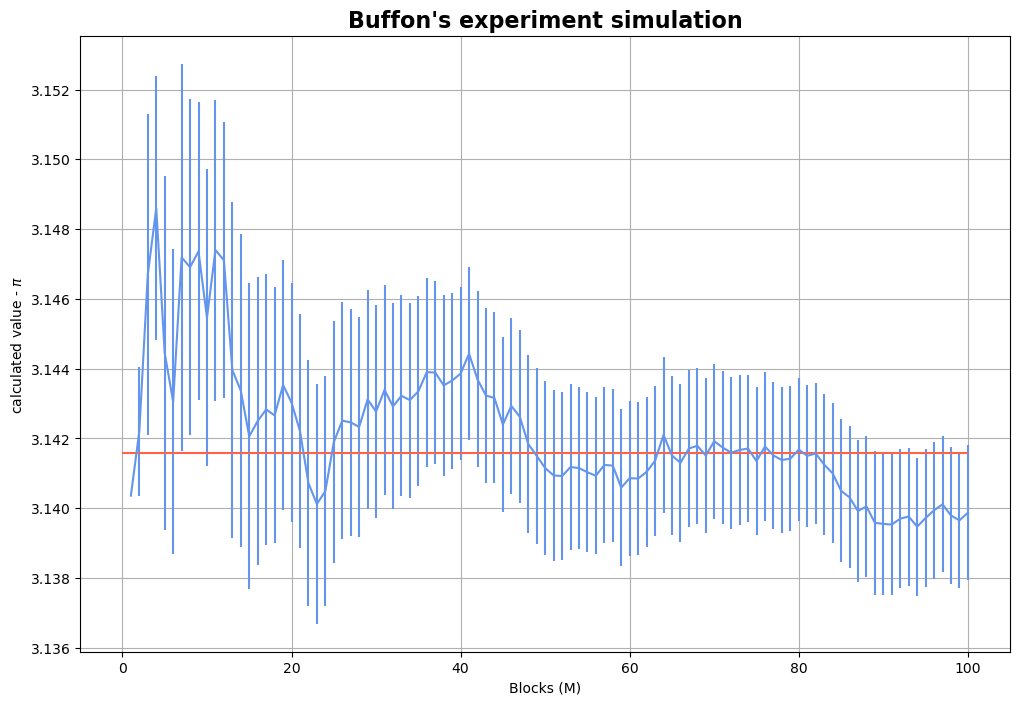

In [32]:
n, a, err = np.loadtxt("buffon.out", usecols=(0,1,2), delimiter="\t", unpack='true')
fig=plt.figure(figsize=(12, 8))
plt.errorbar(n, a, yerr=err, color='Cornflowerblue')
plt.grid(True)
plt.title("Buffon's experiment simulation",fontsize=16, fontweight='bold')
plt.hlines(3.1415926, 0, 100, color='tomato')
plt.xlabel("Blocks (M)")
plt.ylabel(r'calculated value - $\pi$')
plt.show()